In [1]:
import os
import re
import ast

import pandas as pd
import numpy as np
import seaborn as sns

from datetime import date, datetime


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


pd.options.display.max_colwidth = 280

In [2]:
df = pd.read_csv("resources/table_urls_clean_topjune12.csv")

df.head()

,Unnamed: 0,tweet_id,date,full_text,user,entities,short_url,expanded_url,number_urls,hashtags,user_mentions,full_text_processed
0,0,1268297737637892107,2020-06-03 21:45:19,aurélien barrau spacex et la nouvelle conquête spatiale la démonstration de notre incohérence,JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/mcnMaQfKQt', 'expanded_url': 'https://www.goodplanet.info/2020/06/02/aurelien-barrau-la-tristesse-de-la-conquete-spatiale/', 'display_url': 'goodplanet.info/2020/06/02/aur…', 'indices': [102, ...",['https://t.co/mcnMaQfKQt'],['https://www.goodplanet.info/2020/06/02/aurelien-barrau-la-tristesse-de-la-conquete-spatiale/'],1,[],[],aurélien barrau spacex nouvelle conquête spatiale démonstration incohérence
1,1,1267927751027277827,2020-06-02 21:15:07,les forêts tropicales continuent de disparaître à un rythme alarmantarticle complet à lire ici,JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yW4t96Z1hi', 'expanded_url': 'https://www.facebook.com/jeanmarc.jancovici/posts/10159380170882281', 'display_url': 'facebook.com/jeanmarc.janco…', 'indices': [98, 121]}, {'url': 'https://t.co/...","['https://t.co/yW4t96Z1hi', 'https://t.co/ckJj5wLgEO']","['https://www.facebook.com/jeanmarc.jancovici/posts/10159380170882281', 'https://www.lemonde.fr/planete/article/2020/06/02/les-forets-tropicales-continuent-de-disparaitre-a-un-rythme-alarmant_6041451_3244.html']",2,[],[],forêts tropicales continuent disparaître rythme alarmantarticle complet lire ici
2,2,1266469311952171019,2020-05-29 20:39:48,jean marc jancovici était invité dans la matinale de la rts radio télevision suisse le 21 mai 2020 pour parler de l après covid podcast de 26,JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/LR3VLNyYoy', 'expanded_url': 'https://soundcloud.com/effondrement-imminent/jancovici-dans-la-matinale-de-la-rts-21052020', 'display_url': 'soundcloud.com/effondrement-i…', 'indices': [148, 171...",['https://t.co/LR3VLNyYoy'],['https://soundcloud.com/effondrement-imminent/jancovici-dans-la-matinale-de-la-rts-21052020'],1,[],[],jean marc jancovici invité matinale rts radio télevision suisse 21 mai 2020 l covid podcast 26
3,3,1266398083962884099,2020-05-29 15:56:46,le progrès technique ne suffira pas à la diminution des émissions de gaz à effet de serre des avions indispensable contre le réchauffement climatique affirment plus de 550 étudiants du secteur de l aéronautique,JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/W2iFOLUIuV', 'expanded_url': 'https://www.lemonde.fr/idees/article/2020/05/29/aeronautique-la-transition-ecologique-impose-une-profonde-transformation-de-notre-industrie_6041127_3232.html', 'd...",['https://t.co/W2iFOLUIuV'],['https://www.lemonde.fr/idees/article/2020/05/29/aeronautique-la-transition-ecologique-impose-une-profonde-transformation-de-notre-industrie_6041127_3232.html'],1,[],[],progrès technique suffira diminution émissions gaz serre avions indispensable réchauffement climatique affirment 550 étudiants secteur l aéronautique
4,4,1266028941141295105,2020-05-28 15:29:55,transports faut il supprimer les lignes aériennes qui font de l ombre au train,JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ERZ4kpNPr1', 'expanded_url': 'https://www.20minutes.fr/planete/2786215-20200526-transports-faut-supprimer-lignes-aeriennes-font-ombre-train?fbclid=IwAR1aKRn08o8hNfcjZVTkVm5vjbKDucoqTuQN_MBTomp...",['https://t.co/ERZ4kpNPr1'],['https://www.20minutes.fr/planete/2786215-20200526-transports-faut-supprimer-lignes-aeriennes-font-ombre-train?fbclid=IwAR1aKRn08o8hNfcjZVTkVm5vjbKDucoqTuQN_MBTompY7djiFd5xYtG99Nk'],1,[],[],transports faut supprimer lignes aériennes l ombre train


In [3]:
brut = pd.read_csv("resources/extract/table_max_june04.csv")

brut.head()        

,Unnamed: 0,tweet_id,date,full_text,user,entities
0,0,1268297737637892107,2020-06-03 21:45:19,Aurélien Barrau : « SpaceX et la nouvelle conquête spatiale : la démonstration de notre incohérence »\nhttps://t.co/mcnMaQfKQt,JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/mcnMaQfKQt', 'expanded_url': 'https://www.goodplanet.info/2020/06/02/aurelien-barrau-la-tristesse-de-la-conquete-spatiale/', 'display_url': 'goodplanet.info/2020/06/02/aur…', 'indices': [102, ..."
1,1,1267927751027277827,2020-06-02 21:15:07,Les forêts tropicales continuent de disparaître à un rythme alarmant\nArticle complet à lire ici : https://t.co/yW4t96Z1hi\nhttps://t.co/ckJj5wLgEO,JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yW4t96Z1hi', 'expanded_url': 'https://www.facebook.com/jeanmarc.jancovici/posts/10159380170882281', 'display_url': 'facebook.com/jeanmarc.janco…', 'indices': [98, 121]}, {'url': 'https://t.co/..."
2,2,1266469311952171019,2020-05-29 20:39:48,"Jean-Marc Jancovici était invité dans la matinale de la RTS (Radio Télevision Suisse) le 21 mai 2020 pour parler de ""L'Après Covid"".\nPodcast de 26'\nhttps://t.co/LR3VLNyYoy",JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/LR3VLNyYoy', 'expanded_url': 'https://soundcloud.com/effondrement-imminent/jancovici-dans-la-matinale-de-la-rts-21052020', 'display_url': 'soundcloud.com/effondrement-i…', 'indices': [148, 171..."
3,3,1266398083962884099,2020-05-29 15:56:46,"Le progrès technique ne suffira pas à la diminution des émissions de gaz à effet de serre des avions, indispensable contre le réchauffement climatique, affirment plus de 550 étudiants du secteur de l’aéronautique \nhttps://t.co/W2iFOLUIuV",JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/W2iFOLUIuV', 'expanded_url': 'https://www.lemonde.fr/idees/article/2020/05/29/aeronautique-la-transition-ecologique-impose-une-profonde-transformation-de-notre-industrie_6041127_3232.html', 'd..."
4,4,1266028941141295105,2020-05-28 15:29:55,Transports : Faut-il supprimer les lignes aériennes qui font de l’ombre au train ?\nhttps://t.co/ERZ4kpNPr1,JMJancovici,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ERZ4kpNPr1', 'expanded_url': 'https://www.20minutes.fr/planete/2786215-20200526-transports-faut-supprimer-lignes-aeriennes-font-ombre-train?fbclid=IwAR1aKRn08o8hNfcjZVTkVm5vjbKDucoqTuQN_MBTomp..."


In [16]:
df["full_text"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
8477     True
8478    False
8479    False
8480    False
8481    False
Name: full_text, Length: 8482, dtype: bool

In [22]:
df[df["full_text"].isna()].index

Int64Index([ 129,  139,  167,  236,  248, 1489, 1612, 1994, 2017, 2150, 2151,
            2366, 2434, 2643, 2644, 2765, 2993, 3004, 3013, 3026, 5287, 8046,
            8231, 8395, 8477],
           dtype='int64')

In [27]:
# why non utf-8 strings?

In [ ]:
df["full_text_processed"] = df["full_text_processed"].values.astype("U")

In [4]:
df.shape

(8482, 12)

In [20]:
https://twitter.com/i/web/status/1194993954330173446

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8482 non-null   int64 
 1   tweet_id    8482 non-null   int64 
 2   date        8482 non-null   object
 3   full_text   8482 non-null   object
 4   user        8482 non-null   object
 5   entities    8482 non-null   object
dtypes: int64(2), object(4)
memory usage: 397.7+ KB


In [26]:
df.iloc[7549]

Unnamed: 0                                                                                                                                                                                                                                                                                                 111
tweet_id                                                                                                                                                                                                                                                                                   1194993954330173446
date                                                                                                                                                                                                                                                                                       2019-11-14 15:02:15
full_text               nous estimons que près d un cinquième de la mondiale de la consomma

In [6]:
df["user_mentions"].value_counts()

[]                                                4170
['theShiftPR0JECT']                                199
['Carbone4']                                       131
['maxcordiez']                                      63
['bensabaugcap']                                    37
                                                  ... 
['Europarl_EN', 'Europarl_FR', 'TimmermansEU']       1
['__PatK__', 'jdl288', 'JMJancovici']                1
['mayalab10']                                        1
['XavierGorce', 'TristanKamin', 'XavierGorce']       1
['LNC6777']                                          1
Name: user_mentions, Length: 2108, dtype: int64

In [5]:
brut.iloc[7549]["full_text"]

'« Nous estimons que près d’un cinquième de la ↗️ mondiale de la consommation d’#énergie en 2018 est imputable à des étés plus chauds, poussant à la hausse la demande de refroidissement, et aux vagues de froid, entraînant une augmentation des besoins en chauffage. » @IEA, WEO2019 https://t.co/u4ln0a7m5R'

In [4]:
brut.iloc[7549].entities

"{'hashtags': [{'text': 'énergie', 'indices': [79, 87]}], 'symbols': [], 'user_mentions': [{'screen_name': 'IEA', 'name': 'IEA', 'id': 84679163, 'id_str': '84679163', 'indices': [266, 270]}], 'urls': [], 'media': [{'id': 1194993950194573312, 'id_str': '1194993950194573312', 'indices': [280, 303], 'media_url': 'http://pbs.twimg.com/media/EJV4qpYWoAASbdK.png', 'media_url_https': 'https://pbs.twimg.com/media/EJV4qpYWoAASbdK.png', 'url': 'https://t.co/u4ln0a7m5R', 'display_url': 'pic.twitter.com/u4ln0a7m5R', 'expanded_url': 'https://twitter.com/maxcordiez/status/1194993954330173446/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 1200, 'h': 529, 'resize': 'fit'}, 'small': {'w': 680, 'h': 300, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1335, 'h': 589, 'resize': 'fit'}}}]}"

In [6]:
# tokens uniques
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["full_text_processed"])
print(vectorizer.get_feature_names())

['00', '000', '01', '02', '03', '03alors', '04', '05', '06', '06après', '07', '08', '09', '0_c59e2fd7a9', '0c38zei2ko', '0easomngsw', '0fj7igkifh', '0gbcx19ikb', '0gt1yxwufc', '0h3mpwpw7', '0i8l0xjk8', '0kxr8vtwbo', '0l7pbpmxi0', '0p2zx6t21v', '0qz7zvcz7y', '0wy6t5udlo', '0x43kltfpj', '0y1jxe3fcq', '10', '100', '1000', '10000', '1000ppm', '100k', '103', '105', '10500', '1055', '107', '108', '10bn', '10e', '10gco2', '10h', '10h20', '10mds', '10mrd', '11', '110', '1100', '11000', '111', '112', '113', '114', '115', '115013739', '1170', '119', '11h', '11ème', '12', '120', '1200', '121', '122', '123', '125', '1250', '1258', '12gco2', '12gco2éq', '12h', '12h14h', '12h30', '12h40', '12k', '13', '130', '1300', '131', '133', '1332', '1335', '1346', '135', '1350', '137', '13h', '13h15', '13h30', '13hbérengère', '13williston', '14', '140', '141', '144', '145', '1458', '147', '1479', '14h', '14h00', '14h15', '14h30', '15', '150', '1500', '15000', '150k', '151', '156', '157', '159', '15h', '15h00',

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["full_text_processed"])
print(vectorizer.get_feature_names())

['00', '000', '01', '02', '03', '03alors', '04', '05', '06', '06après', '07', '08', '09', '0_c59e2fd7a9', '0c38zei2ko', '0easomngsw', '0fj7igkifh', '0gbcx19ikb', '0gt1yxwufc', '0h3mpwpw7', '0i8l0xjk8', '0kxr8vtwbo', '0l7pbpmxi0', '0p2zx6t21v', '0qz7zvcz7y', '0wy6t5udlo', '0x43kltfpj', '0y1jxe3fcq', '10', '100', '1000', '10000', '1000ppm', '100k', '103', '105', '10500', '1055', '107', '108', '10bn', '10e', '10gco2', '10h', '10h20', '10mds', '10mrd', '11', '110', '1100', '11000', '111', '112', '113', '114', '115', '115013739', '1170', '119', '11h', '11ème', '12', '120', '1200', '121', '122', '123', '125', '1250', '1258', '12gco2', '12gco2éq', '12h', '12h14h', '12h30', '12h40', '12k', '13', '130', '1300', '131', '133', '1332', '1335', '1346', '135', '1350', '137', '13h', '13h15', '13h30', '13hbérengère', '13williston', '14', '140', '141', '144', '145', '1458', '147', '1479', '14h', '14h00', '14h15', '14h30', '15', '150', '1500', '15000', '150k', '151', '156', '157', '159', '15h', '15h00',

In [8]:
X

<8482x19319 sparse matrix of type '<class 'numpy.float64'>'
	with 101352 stored elements in Compressed Sparse Row format>

In [9]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df["full_text_processed"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,00,000,01,02,03,03alors,04,05,06,06après,...,путина,разговора,разрывом,санкт,сделки,содержание,узнал,шax,электростанция,چادری
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df['https'] = df.apply(lambda row: "y" if "https" in row["full_text_processed"])

SyntaxError: invalid syntax (<ipython-input-18-4d638a8af6b4>, line 1)

In [17]:
df['https'] = df["full_text_processed"].map(lambda x: if "https" in x "Y" )

SyntaxError: invalid syntax (<ipython-input-17-347e63395080>, line 1)

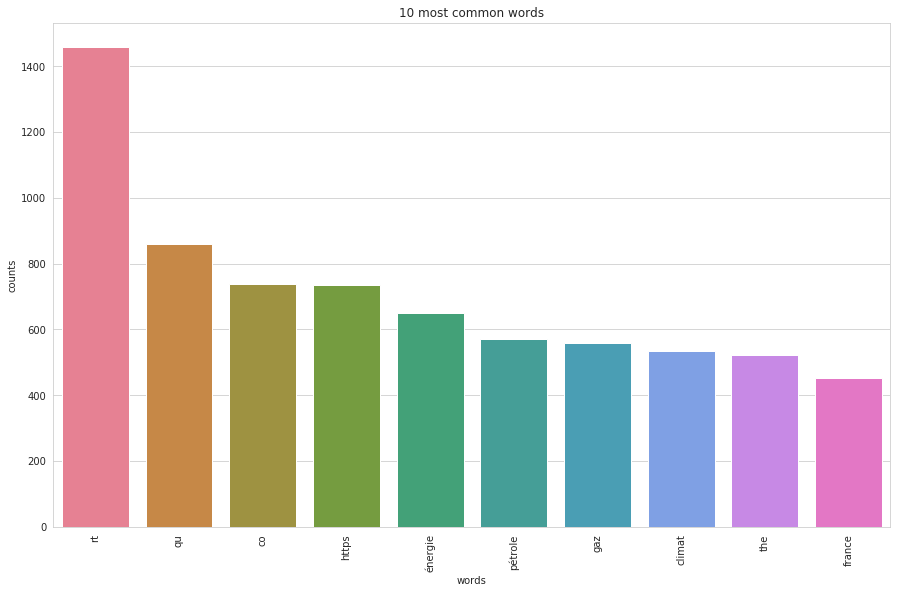

In [15]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
count_vectorizer = CountVectorizer()# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df["full_text_processed"])# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [19]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
rt co https qu monde énergie pétrole france voiture article

Topic #1:
jean jancovici marc rt article climat publié conférence climatique vidéo

Topic #2:
rt the to of qu is in and shift oil

Topic #3:
https co pétrole gaz graphique pays climatique charbon énergie france

Topic #4:
qu énergie carbone gaz rt émissions faire fossiles nucléaire faut


In [26]:
%%time

from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:

    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte